
| **Chapter**                   | 3:  Host factors                                      |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 3.x: Determining a WAIFW matrix from a contact network                    |
| **Package prerequisites**     | [NetworkX](https://networkx.org)                                     |


# Determining a WAIFW matrix from a contact network

This notebook uses data from Rocha *et al.* on sexual networks.[^1]

[^1]: L E C Rocha, F Liljeros and P Holme (2010). Information dynamics shape the sexual networks of Internet-mediated prostitution. *PNAS* **107**(13) 5706-5711.

In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from matplotlib import rcParams
import networkx as nx
import pandas as pd
import seaborn as sns

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

## Importing the Rocha _et al._ contact network

In [2]:
df = pd.read_csv("/data/workspace_files/pcbi.1001109.s001.csv", skiprows=24, header=None, sep=";")[[0, 1]]
df = df.rename(columns={0: "F", 1: "M"})

## Creating a NetworkX object from the edge list

In [3]:
n = nx.convert_matrix.from_pandas_edgelist(df, source="F", target="M", create_using=nx.MultiGraph)

In [4]:
# number of individuals by degree:

individuals_by_degree = pd.DataFrame(list(n.degree), columns=["id", "degree"])
number_by_degree = pd.DataFrame(list(n.degree), columns=["id", "degree"]).groupby("degree").count().rename(columns={"id": "count"})

In [5]:
len(n.nodes)

16730

In [6]:
len(n.edges)

50632

In [7]:
len(number_by_degree.index)

149

## Plot degree distribution

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


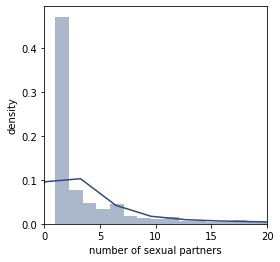

In [8]:
fig = plt.figure(facecolor="w", figsize=(4, 4))

ax1 = fig.add_subplot(111, axisbelow=True)

sns.distplot(individuals_by_degree.degree, ax=ax1, bins=500, color=COLORS["S"])
ax1.set_xlim(0, 20)
ax1.set_xlabel("number of sexual partners")
ax1.set_ylabel("density")

ax1.grid(b=True, which='major', c='w', lw=2, ls='-')

plt.savefig("distribution_of_sexual_partners.pdf", dpi=600)
plt.show()

In [9]:
## Estimating the WAIFW matrix structured by number of sexual partners

In [10]:
mixing_matrix = nx.degree_mixing_matrix(n, normalized=False)

In [11]:
betas = mixing_matrix / np.outer(number_by_degree, number_by_degree)

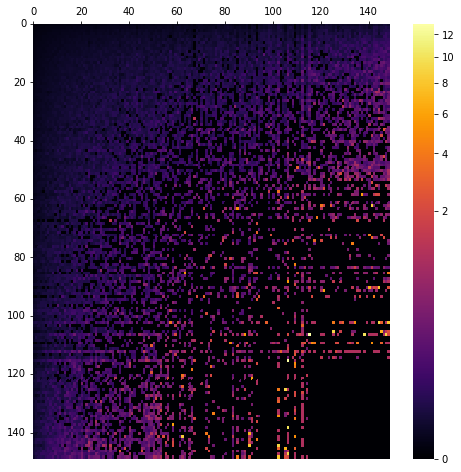

In [12]:
from matplotlib.colors import PowerNorm
from matplotlib import ticker

fig = plt.figure(facecolor="w", figsize=(8, 8))
ax = fig.add_subplot(111)
g = sns.heatmap(betas, ax=ax, cmap="inferno", norm=PowerNorm(gamma=0.3))

ax.xaxis.tick_top()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.savefig("beta_matrix.pdf", dpi=1200)
